# Data exploration of pipeline accidents
## Chris Stafford
### 3/2/18

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import folium
import folium.plugins as plugins
import os
from datetime import datetime as dt
from dateutil import parser
import pandas_profiling as pp
%matplotlib inline

Read data

In [2]:
df = pd.read_csv('data/pipeline-accidents.csv')


Show data scheme and get a sence for what information the data contains

In [3]:
df.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [4]:
df.head()


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [5]:
pp.ProfileReport(df)

Number of variables,48
Number of observations,2795
Total Missing (%),25.9%
Total size in memory,1.0 MiB
Average record size in memory,384.0 B
Numeric,22
Categorical,18
Date,0
Text (Unique),0
Rejected,8
Distinct count,1028


Select Location Data

In [6]:
loc_df = df.filter(['Report Number','Supplemental Number', 'Operator Name', 'Accident Latitude', 'Accident Longitude','Pipeline Type','Liquid Explosion'])

In [7]:
loc_df.describe()

,Report Number,Supplemental Number,Accident Latitude,Accident Longitude
count,2.795000e+03,2795.000000,2795.000000,2795.000000
mean,2.013293e+07,19433.319499,35.781608,-95.682691
std,1.982098e+04,1724.815370,5.652599,12.328430
min,2.010000e+07,15072.000000,18.448010,-158.099930
25%,2.012004e+07,17978.500000,30.909375,-100.587636
50%,2.013037e+07,19502.000000,34.925440,-95.488870
75%,2.015023e+07,20996.500000,40.264062,-91.089463
max,2.017003e+07,22049.000000,70.261265,104.263399


Drop null and Nan values in location data

In [8]:
loc_df.dropna(axis = 0,how = 'any',inplace = True)

## Where are accident hotspots?

### Create an interactive heat map for accident incidence over the full time frame of the available data

In [9]:
lat_long = loc_df.filter(['Accident Latitude', 'Accident Longitude'])
lat_long = lat_long.values.tolist()

In [10]:
#Create map
m = folium.Map([35., -90.], tiles='stamentoner', zoom_start=5)

plugins.HeatMap(lat_long).add_to(m)

m

## How does location of accident incidence change over time?

turn date column into useful date-time classifications

In [11]:
df['date'] = df['Accident Date/Time']
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday_name
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear

In [12]:
loc_time_df = df.filter(['Report Number','Accident Latitude', 'Accident Longitude','month','year'])

Split location data by year, month of incident.
Create interactive heatmap animation of accident incident by month.

In [13]:
#Generate Data for folium map

year = loc_time_df.year.unique()
month = loc_time_df.month.unique()

data = []
for y in year:
    for mo in month:
        locmy_df = loc_time_df[(loc_time_df['month'] == mo) & (loc_time_df['year'] == y)]
        lat_long = locmy_df.filter(['Accident Latitude', 'Accident Longitude']).values.tolist()
        data.append(lat_long)

In [49]:
#Create Map
m = folium.Map([38., -90.], tiles='stamentoner', zoom_start=4)

hm = plugins.HeatMapWithTime(data)

hm.add_to(m)

m

## Does the number of accidents change over time?

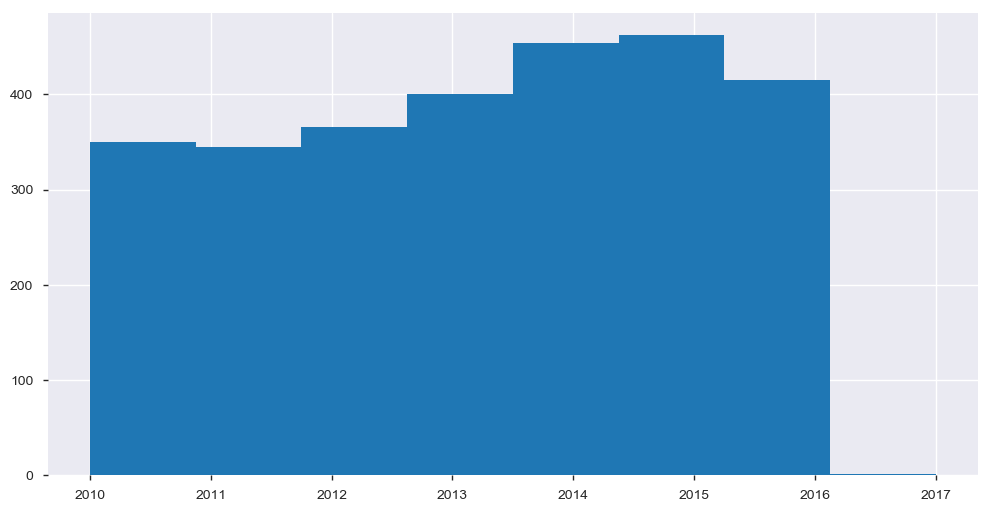

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.hist(df.year, bins = 8);

It certainly looks like accidents are increasing over the course of 6 years,  but is this change significant?

Lets perform a t-test to look at the number of incidents per day in 2010 vs 2016 to see if the accidents per day have changed over the years.
Lets use a p value of .05 to check for significance

In [48]:
#Collect counts of accidents per day and add zeros where accidents didn't occur

df['date_notime'] = df.date.dt.date
countperday =  df.groupby(['date_notime'])['day'].count()
idx = pd.date_range('01-01-2010', '12-31-2016')
countperday.index = pd.DatetimeIndex(countperday.index)
countperday = countperday.reindex(idx, fill_value=0)

In [40]:
countperday.head()

2010-01-01    1
2010-01-02    0
2010-01-03    0
2010-01-04    1
2010-01-05    1
Freq: D, Name: day, dtype: int64

### T-test

In [47]:
test_statistics = stats.ttest_ind(countperday.iloc[0:365],countperday.iloc[-366:], equal_var=False)
print('T-Statistic: {0:0.8f}, P-Value: {1:0.8f}'.format(test_statistics[0]/2, test_statistics[1]))

T-Statistic: -1.08463404, P-Value: 0.03038487


There has been a statistically signifcant increase in accidents from 2010 to 2016.  Let's assume that this increase in accidents per day happened due to a single event.  Let's try to find that switch date.

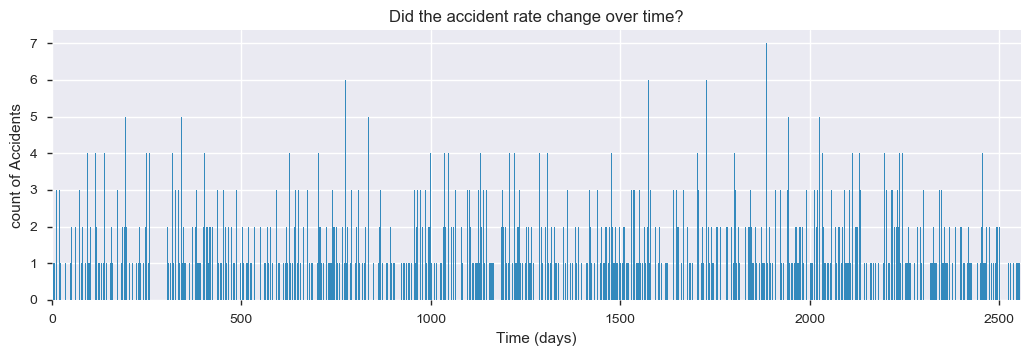

In [50]:
fig = plt.figure(figsize=(12.5, 3.5))
ax = fig.add_subplot(111)

n_count_data = len(countperday)
ax.bar(np.arange(n_count_data), countperday, color="#348ABD")
ax.set_xlabel("Time (days)")
ax.set_ylabel("count of Accidents")
ax.set_title("Did the accident rate change over time?")
ax.set_xlim(0, n_count_data);

In [ ]:
import pymc3 as pm
import theano.tensor as tt

## assign lambdas and tau to stochastic variables
with pm.Model() as model:
    alpha = 1.0/countperday.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

## create a combined function for lambda (it is still a RV)    
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

## combine the data with our proposed data generation scheme    
with model:
    observation = pm.Poisson("obs", lambda_, observed=countperday)

## inference
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)
    
## get the variables we want to plot from our trace
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

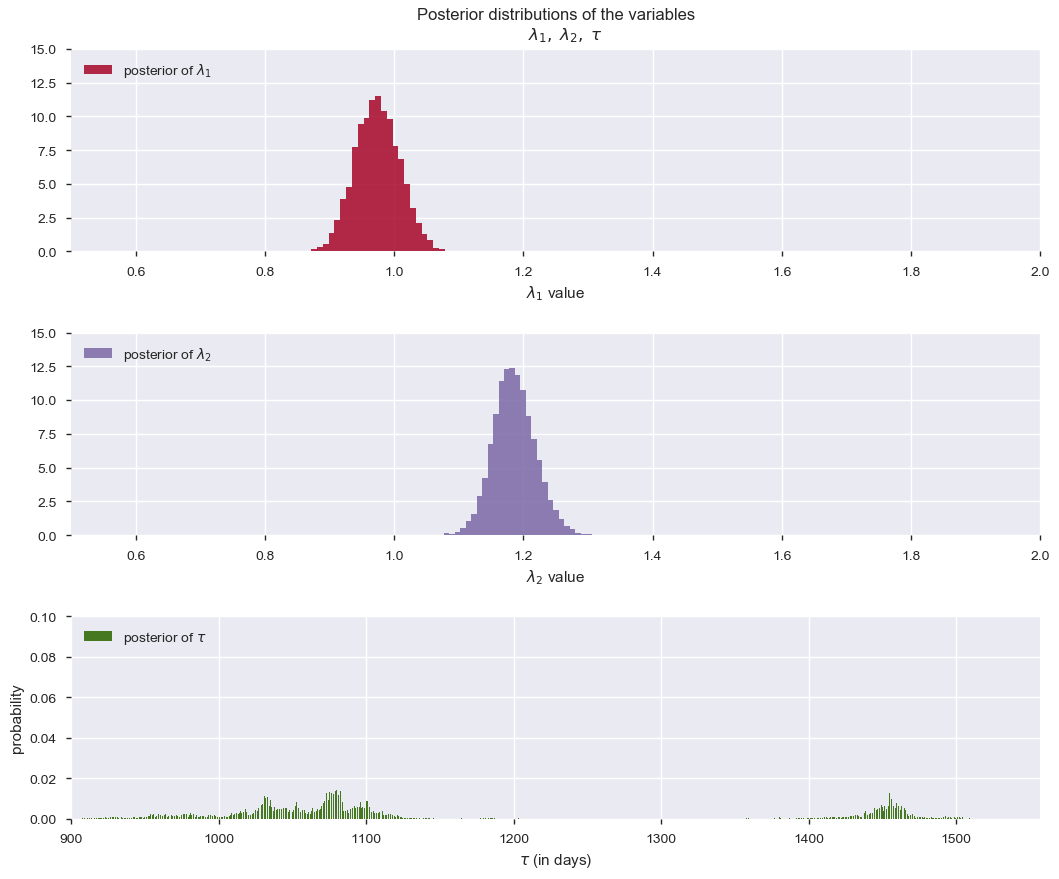

In [63]:
# draw histogram of the samples:
fig = plt.figure(figsize=(12.5,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

for ax in [ax1,ax2]:
    ax.set_autoscaley_on(False)

## axis 1    
ax1.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
ax1.legend(loc="upper left")
ax1.set_title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
ax1.set_xlim([0.5, 2])
ax1.set_ylim([0,15])
ax1.set_xlabel("$\lambda_1$ value")

## axis 2
ax2.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
ax2.legend(loc="upper left")
ax2.set_xlim([0.5, 2])
ax2.set_ylim([0,15])
ax2.set_xlabel("$\lambda_2$ value")

## axis 3
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
ax3.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
#ax3.set_xticks(np.arange(n_count_data))

ax3.legend(loc="upper left")
ax3.set_ylim([0, .1])
ax3.set_xlim([900, len(countperday)-1000])
ax3.set_xlabel(r"$\tau$ (in days)")
ax3.set_ylabel("probability");
plt.subplots_adjust(hspace=0.4)